In [1]:
import numpy as np
import mne
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import aseegg as ag

In [2]:
# częstotliwość próbkowania
sfreq = 250

In [3]:
data = pd.read_csv("Osoba1/data1_out.csv", header=None)

In [4]:
data.columns = ['FCz','Cz','Fz','Pz','C3','C4','F3','F4','event']
data.head()

,FCz,Cz,Fz,Pz,C3,C4,F3,F4,event
0,18355.10,-33918.26,-7523.62,6972.31,24853.93,7137.45,25722.45,17377.32,0.0
1,18044.72,-33939.43,-7768.82,6873.92,24846.09,7134.54,25716.04,17381.41,0.0
2,17554.68,-33931.24,-8007.45,6819.72,24868.97,7156.45,25728.11,17408.28,0.0
3,17189.56,-33929.99,-8130.27,6828.97,24885.83,7161.97,25748.22,17416.21,0.0
4,17456.35,-33925.79,-7895.04,6921.82,24886.86,7152.83,25750.13,17401.75,0.0


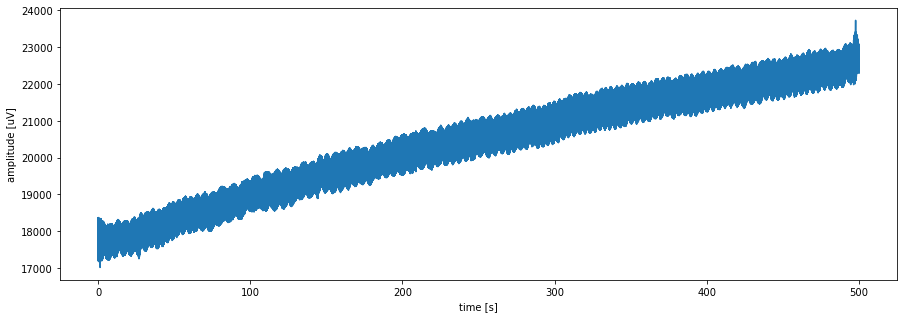

In [5]:
# wykres dla pierwszej elektrody (cały czas trwania eksperymentu dla 1 osoby)
alltime = np.linspace(0, 500, data['FCz'].size)
plt.figure(figsize=(15,5))
plt.xlabel('time [s]')
plt.ylabel('amplitude [uV]')
plt.plot(alltime, data['FCz'])

In [6]:
# pierwsze 2 sekundy sygnału
fragment = data.iloc[:sfreq*2, :9]
fragment.head()

,FCz,Cz,Fz,Pz,C3,C4,F3,F4,event
0,18355.10,-33918.26,-7523.62,6972.31,24853.93,7137.45,25722.45,17377.32,0.0
1,18044.72,-33939.43,-7768.82,6873.92,24846.09,7134.54,25716.04,17381.41,0.0
2,17554.68,-33931.24,-8007.45,6819.72,24868.97,7156.45,25728.11,17408.28,0.0
3,17189.56,-33929.99,-8130.27,6828.97,24885.83,7161.97,25748.22,17416.21,0.0
4,17456.35,-33925.79,-7895.04,6921.82,24886.86,7152.83,25750.13,17401.75,0.0


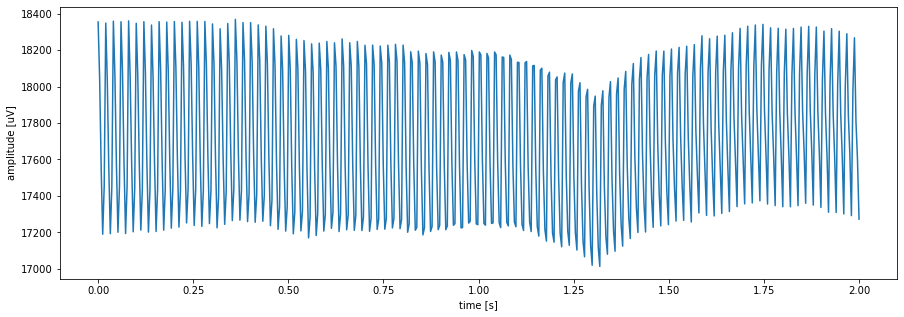

In [7]:
# wykres dla pierwszych 2 sekund (nieprzefiltrowanego) sygnału zarejestrowanego przez pierwszą elektrodę
t1 = np.linspace(0, 2, fragment['FCz'].size)
plt.figure(figsize=(15,5))
plt.xlabel('time [s]')
plt.ylabel('amplitude [uV]')
plt.plot(t1, fragment['FCz'])

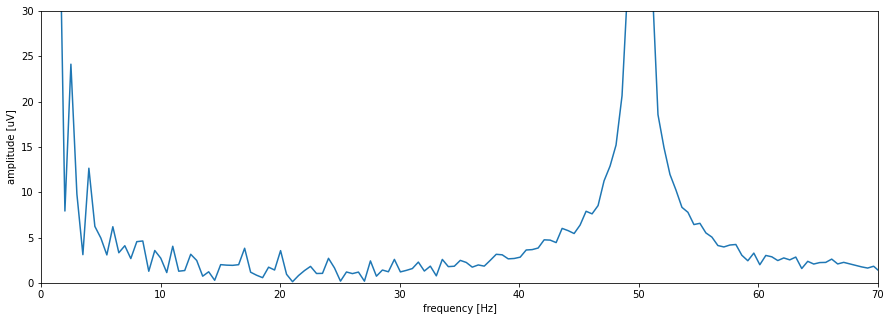

In [8]:
#transformata Fouriera dla pierwszych 2 sekund (nieprzefiltrowanego) sygnału zarejestrowanego przez pierwszą elektrodę
transformata = ag.FFT(fragment['FCz'])
t2 = np.linspace(0, sfreq, fragment['FCz'].size)
plt.figure(figsize=(15,5))
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [uV]')
plt.xlim([0,70])
plt.ylim([0,30])
plt.plot(t2, transformata)

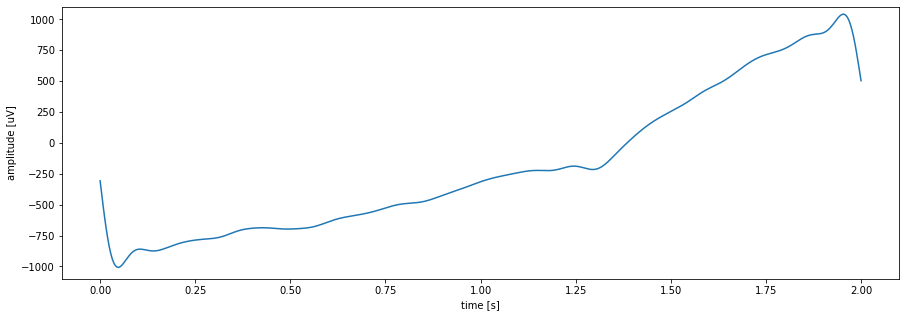

In [9]:
# wykres dla pierwszych 2 sekund przefiltrowanego sygnału (filtr pasmowoprzepustowy 0.1Hz-10Hz)
filtered = ag.pasmowoprzepustowy(fragment['FCz'], sfreq, 0.1, 10)
t3 = np.linspace(0, 2, filtered.size)
plt.figure(figsize=(15,5))
plt.xlabel('time [s]')
plt.ylabel('amplitude [uV]')
plt.ylim([-1100,1100])
plt.plot(t3, filtered)

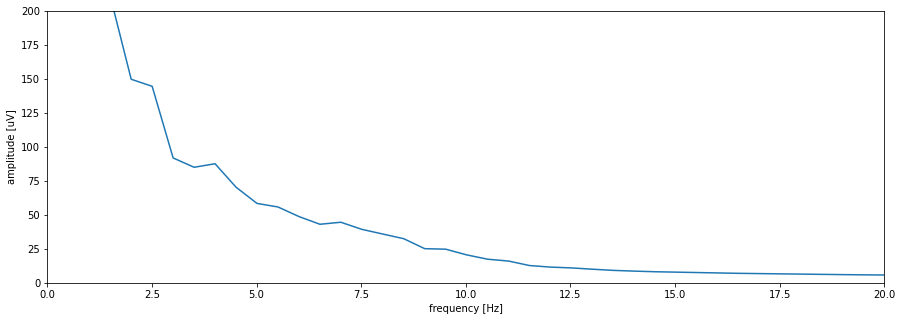

In [10]:
#transformata Fouriera dla pierwszych 2 sekund przefiltrowanego sygnału (filtr pasmowoprzepustowy 0.1Hz-10Hz)
# nie rozumiem zbytnio dlaczego przy 250Hz cokolwiek się dzieje (czy coś wcześniej zrobiłam źle?)
transformata2 = ag.FFT(filtered)
t4 = np.linspace(0, sfreq, filtered.size)
plt.figure(figsize=(15,5))
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [uV]')
plt.xlim([0,20])
plt.ylim([0,200])
plt.plot(t4, transformata2)

In [11]:
# od teraz będę już pracować na przefiltrowanym sygnale

filtered_data = pd.DataFrame()

filtered_data['FCz'] = ag.pasmowoprzepustowy(data['FCz'], sfreq, 0.1, 10)
filtered_data['Cz'] = ag.pasmowoprzepustowy(data['Cz'], sfreq, 0.1, 10)
filtered_data['Fz'] = ag.pasmowoprzepustowy(data['Fz'], sfreq, 0.1, 10)
filtered_data['Pz'] = ag.pasmowoprzepustowy(data['Pz'], sfreq, 0.1, 10)
filtered_data['C3'] = ag.pasmowoprzepustowy(data['C3'], sfreq, 0.1, 10)
filtered_data['C4'] = ag.pasmowoprzepustowy(data['C4'], sfreq, 0.1, 10)
filtered_data['F3'] = ag.pasmowoprzepustowy(data['F3'], sfreq, 0.1, 10)
filtered_data['F4'] = ag.pasmowoprzepustowy(data['F4'], sfreq, 0.1, 10)
filtered_data['event'] = data['event']
filtered_data

,FCz,Cz,Fz,Pz,C3,C4,F3,F4,event
0,-69.159712,-6.847364,-104.973881,-39.302941,7.394851,0.599324,3.905155,14.841559,0.0
1,-173.566969,-8.694808,-160.722595,-54.704480,10.097225,2.020676,6.547795,19.076342,0.0
2,-275.202303,-10.502429,-214.986973,-69.793190,12.706700,3.385023,9.139025,23.219341,0.0
3,-371.435879,-12.231730,-266.308818,-84.223571,15.146168,4.639472,11.640513,27.170606,0.0
4,-459.964260,-13.849428,-313.408876,-97.690281,17.347819,5.739726,14.017530,30.842539,0.0
...,...,...,...,...,...,...,...,...,...
125407,-9.015855,-142.443141,-255.017939,-165.670434,-151.400875,-88.692123,-154.669627,-121.274671,0.0
125408,-8.817271,-130.477496,-233.841231,-151.367987,-138.573259,-81.461578,-141.951300,-111.284128,0.0
125409,-8.698225,-117.493241,-210.902598,-135.816156,-124.661276,-73.616551,-128.172127,-100.410196,0.0
125410,-8.630755,-103.806631,-186.750572,-119.410058,-110.006950,-65.342554,-113.657763,-88.917164,0.0


In [12]:
# wycinanie 2-sekundowych kawałków dnaych (od 1s przed naciśnięciem spacji do 1s po) dla udanych naciśnięć spacji
# dla jednego eventu zapisuję 500 wierszy danych
# liczba eventów tego typu to 332

successful_clicks = pd.DataFrame()
event = False

for row in range(filtered_data.shape[0]):
    if filtered_data.iloc[row, 8] == 1 and event == False:
        successful_clicks = pd.concat([successful_clicks, filtered_data.iloc[row-sfreq:row+sfreq, :9]])
        event = True
    elif filtered_data.iloc[row, 8] != 1:
        event = False
        
successful_clicks

,FCz,Cz,Fz,Pz,C3,C4,F3,F4,event
1770,6.899964,-16.915341,33.423618,-4.256772,-25.919088,3.918438,-29.689652,-20.109332,0.0
1771,6.739547,-16.666716,33.709454,-2.796138,-25.017768,4.002751,-29.469558,-20.362764,0.0
1772,6.321566,-16.715930,33.740138,-1.617822,-24.404140,3.836486,-29.436205,-20.925250,0.0
1773,5.665740,-17.045532,33.537599,-0.751528,-24.094676,3.442090,-29.573118,-21.765919,0.0
1774,4.808200,-17.621461,33.134434,-0.205873,-24.088242,2.854384,-29.856131,-22.840243,0.0
...,...,...,...,...,...,...,...,...,...
124052,-28.951614,-59.281965,-88.497032,-67.811213,-67.790080,-52.491687,-75.957491,-68.874167,0.0
124053,-25.432251,-57.062883,-84.962135,-66.262671,-66.127721,-51.154356,-73.773357,-66.723460,0.0
124054,-22.029328,-54.949156,-81.389818,-64.716754,-64.348795,-49.910791,-71.435363,-64.643083,0.0
124055,-18.805463,-52.969094,-77.849918,-63.208000,-62.486080,-48.769190,-68.981860,-62.651343,0.0


In [13]:
# wycinanie 2-sekundowych kawałków dnaych (od 1s przed naciśnięciem spacji do 1s po) dla nieudanych naciśnięć spacji
# spowodowanych błędem interfejsu
# dla jednego eventu zapisuję 500 wierszy danych
# liczba eventów tego typu to 24

interface_errors = pd.DataFrame()
event = False

for row in range(filtered_data.shape[0]):
    if filtered_data.iloc[row, 8] == 4 and event == False:
        interface_errors = pd.concat([interface_errors, filtered_data.iloc[row-sfreq:row+sfreq, :9]])
        event = True
    elif filtered_data.iloc[row, 8] != 4:
        event = False
        
interface_errors

,FCz,Cz,Fz,Pz,C3,C4,F3,F4,event
6173,13.151436,6.211159,44.777019,20.024620,14.286592,-1.807808,22.344602,3.658853,0.0
6174,13.323215,7.060824,45.131594,20.634321,14.417470,-1.232356,21.777409,3.911260,0.0
6175,13.478077,7.879693,45.460157,21.177250,14.593817,-0.706531,21.252919,4.019066,0.0
6176,13.626465,8.658028,45.765596,21.630398,14.813139,-0.260535,20.804206,3.974595,0.0
6177,13.779570,9.389480,46.052111,21.974076,15.073034,0.079375,20.460046,3.775500,0.0
...,...,...,...,...,...,...,...,...,...
124181,-61.380416,-60.940320,-121.439185,-52.663302,-54.552682,-73.044951,-98.508862,-121.779817,0.0
124182,-62.219458,-61.711430,-122.143134,-53.114672,-54.442600,-74.049509,-98.496278,-123.109611,0.0
124183,-62.963600,-62.487120,-122.745614,-53.536479,-54.336566,-75.124347,-98.457431,-124.406720,0.0
124184,-63.603315,-63.237189,-123.237615,-53.906924,-54.229214,-76.234109,-98.382231,-125.661433,0.0


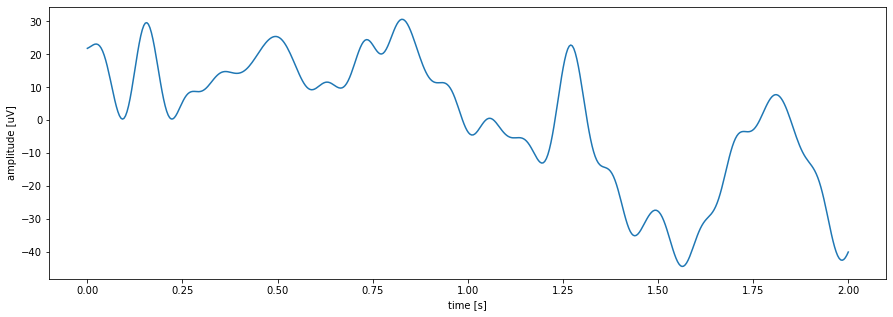

In [20]:
#wykres dla jednego nieudanego wciśnięcia spacji
#można tu zauważyć coś na kaształt interakcyjnego potencjału wywołanego związanego z błędem
fragment = interface_errors.iloc[sfreq*6:sfreq*8, 0]
t = np.linspace(0, 2, fragment.size)
plt.figure(figsize=(15,5))
plt.xlabel('time [s]')
plt.ylabel('amplitude [uV]')
plt.plot(t, fragment)

In [ ]:
# pytania:
# czy powinnam operować na numerach wierszy czy milisekundach? (czy to robi jakąkolwiek różnicę)

In [53]:
# morphological features 1 (latency)
# returns index of max value of sequence
# stop value is NOT checked 
def lat(sequence, start, stop):
    index = sequence.iloc[start:stop].argmax()
    return start + index

index = lat(fragment, 251, 500)
print(index)

317


In [54]:
# morphological features 2 (amplitude)
# returns max value of start:stop slice of sequence
def amp(sequence, start, stop):
    index = sequence.iloc[start:stop].argmax()
    return sequence.iat[start + index]

value = amp(fragment, 251, 500)
print(value)

22.842986071860764


In [62]:
# morphological features 3 (latency/amplitude ratio)
# need to compute lat() and amp() first, their arguments should be the same
def lar(latency, amplitude):
    return latency/amplitude

lat_amp = lar(index, value)
print(lat_amp)

13.877345063502792


In [60]:
# morphological features 4 (absolute amplitude)
# need to compute amp() first
def aamp(amplitude):
    return abs(amplitude)
    
abs_amp = aamp(value)
print(abs_amp)

22.842986071860764


In [63]:
# morphological features 5 (absolute latency/amplitude ratio)
# need to compute lar() first
def alar(ratio):
    return abs(ratio)

abs_lat_amp = alar(lat_amp)
print(abs_lat_amp)

13.877345063502792


In [69]:
# morphological features 6 (positive area)
# returns sum of the positive signal values
def par(sequence, start, stop):
    pos_sum = 0
    for row in sequence.iloc[start:stop]:
        pos_sum += (0.5 * (row + abs(row)))
    return pos_sum

pos_area = par(fragment, 0, 5)
print(pos_area)

111.89180840695005


In [70]:
# morphological features 7 (negative area)
# returns sum of the negative signal values
def nar(sequence, start, stop):
    neg_sum = 0
    for row in sequence.iloc[start:stop]:
        neg_sum += (0.5 * (row - abs(row)))
    return neg_sum

neg_area = nar(fragment, 0, 5)
print(neg_area)

0.0


In [71]:
# morphological features 8 (total area)
# need to compute par() and nar() first
def tar(pos_area, neg_area):
    return pos_area + neg_area

total_area = tar(pos_area, neg_area)
print(total_area)

111.89180840695005


In [75]:
# morphological features 9 (absolute total area)
# need to compute tar() first
def atar(total_area):
    return abs(total_area)

abs_tot_area = atar(total_area)
print(abs_tot_area)

111.89180840695005


In [78]:
# morphological features 10 (total absolute area)
# need to compute par() and nar() first
def taar(pos_area, neg_area):
    return pos_area + abs(neg_area)

tot_abs_area = taar(pos_area, neg_area)
print(tot_abs_area)

111.89180840695005


In [67]:
fragment.head(5)

31351    21.836468
31352    22.080184
31353    22.371059
31354    22.670817
31355    22.933281
Name: FCz, dtype: float64